#Import Library

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import confusion_matrix, classification_report
import random
import math
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Load dataset

In [2]:
pip install ucimlrepo

##Dataset No.1

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

#Normalization

In [4]:
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

X=X.values

sc = StandardScaler()
X = sc.fit_transform(X)

#Formula of swarm intelligence

##PSO
$$v_{i}(t+1)=wv_i(t)+c_1r_1[P_i(t)-x_i(t)]+c_2r_2[G(t)-x_i(t)]$$
$$x_i(t+1)=x_i(t)+v_i(t+1)$$

We can choose 2 versions of weight of PSO.

###PSO-V1
Weight is set to constant.
$$w=0.5$$

###PSO-V2 (Adaptive weight)
Adaptive weight (Diogo Eq.8 or ICBBT V4)
$$w(t)=w_{max}-\frac{w_{max}-w_{min}}{t_{max}}\times t$$
Where $w_{max}=0.9$ and $w_{min}=0.4$

Ref : https://dl.acm.org/doi/full/10.1145/3674658.3674683

##GWO
$$\vec D=|\vec C\cdot \vec X_p(t)-\vec X(t)|$$
$$\vec X_{t+1}=\vec X_p-\vec A\cdot \vec D$$
$$\vec C=2\vec r_2$$
$$\vec A=2\vec a\cdot\vec r_1-\vec a$$
where $r_1,r_2$ are random vectors in $[0,1]$ and $a \in [0,2]$. \\
$$\vec a=2-2\dfrac{t}{t_{max}}$$

###GWO

$$ \begin{array}{rcl} D_\alpha=|C\cdot X_\alpha-X| & D_\beta=|C\cdot X_\beta-X| & D_\delta=|C\cdot X_\delta-X|\\
X_1=X_\alpha-A\cdot D_\alpha & X_2=X_\beta-A\cdot D_\beta & X_3=X_\delta-A\cdot D_\delta \end{array} $$


$$X(t+1)=\dfrac{X_1+X_2+X_3}{3}$$

###MIGWO
$$w_1=\Bigg(1-\dfrac{t}{T}\Bigg)^{1-\dfrac{\tan(\pi (rand-0.5))}{T}}$$
$$w_2=\Bigg(2-\dfrac{2t}{T}\Bigg)^{1-\dfrac{\tan(\pi (rand-0.5))}{T}}$$
When $t < 0.5 T$,
$$ X_1(t+1)= X_\alpha(t)-w_1A_1\cdot D_\alpha (t) $$
$$ X_2(t+1)=X_\beta(t)-w_1A_2\cdot D_\beta (t) $$
$$ X_3(t+1)=X_\delta(t)-w_1A_3\cdot D_\delta (t)$$
When $t \ge 0.5 T$,
$$ X_1(t+1)= w_2X_\alpha(t)-A_1\cdot D_\alpha (t) $$
$$ X_2(t+1)=w_2X_\beta(t)-A_2\cdot D_\beta (t) $$
$$ X_3(t+1)=w_2X_\delta(t)-A_3\cdot D_\delta (t)$$


$$X^v(t+1)=\dfrac{X_1(t+1)+X_2(t+1)+X_3(t+1)}{3}$$

##FA

$$r_{ij}=||x_i-x_j||_2$$
$$\beta=\beta_0 e^{-\gamma r^2}$$
$$x_i^{t+1}=x_i^t+\beta(x_j-x_i)+\alpha(rand-0.5)$$

###LWFA : Logarithmic Weighted Firefly Algorithm
REF : https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0255951

$$w(t)=w_{max}-b(w_{max}-w_{min})\log_Tt$$
Where $w_{max}=0.9$, $w_{min}=0.4$  and  $b=1.0$

$$x_i(t+1)=w(t)x_i(t)+\beta(x_j(t)-x_i(t))+\alpha(rand-0.5)$$

##Hybrid FA PSO
if fitness function x(i) < p_best(i)
$$x_{temp}(i)=x(i)$$
$$\beta=\beta_0 e^{-\gamma r^2}$$
$$x_i(t+1)=x_i (t)+\beta(x_i(t)-gBest)+\alpha(rand-0.5)$$
$$v_i(t+1)=x_i(t+1)+x_{temp}$$
else
$$v_{i}(t+1)=wv_i(t)+c_1r_1[P_i(t)-x_i(t)]+c_2r_2[G(t)-x_i(t)]$$
$$x_i(t+1)=x_i(t)+v_i(t+1)$$

We can choose 2 versions of weight of PSO.

#Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Set initial condition of PSO

In [ ]:
# PSO parameters
n_particles = 50
n_iterations = 50

wmax  = 0.9
wmin  = 0.4

#dim = X.shape[1] + 1  # Features + 1 for SVM C parameter
dim = X.shape[1] + 2  # Features + 2 for SVM C and gamma

w = 0.5  # Inertia weight
c1 = c2 = 1.5  # Acceleration coefficients

#bounds = [(0, 1)] * X.shape[1] + [(0.0001, 10)]  # Feature selection & SVM C range
bounds = [(0, 1)] * X.shape[1] + [(0.0001, 10)]+ [(0.00001, 10)]  # Feature selection & SVM C range & gamma

# Initialize particles
positions = np.random.rand(n_particles, dim)
#velocities = np.random.uniform(-0.1, 0.1, (n_particles, dim))
velocities = 0.1*positions
personal_best_pos = np.copy(positions)
global_best_pos = positions[0]
personal_best_score = np.full(n_particles, float("inf"))
global_best_score = float("inf")

#Define objective function

##Linear SVM

In [ ]:
# Fitness function
def fitness(position):
    selected_features = position[:-1] > 0.5  # Thresholding feature selection
    C_value = position[-1]  # SVM C parameter

    if np.sum(selected_features) == 0:
        return float("inf")  # Penalize empty feature sets

    X_selected = X[:, selected_features]
    model = SVC(C=C_value, kernel='linear')
    score = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy').mean()

    # Fitness: (1 - accuracy) + (feature selection penalty)
    #return (1 - score)*0.9 + (np.sum(selected_features) / X.shape[1] * 0.1)  # Small penalty for more features
    return (1 - score)*0.95 + (np.sum(selected_features) / X.shape[1] * 0.05)
    #return (1 - score)

##Non-Linear SVM

In [7]:
def fitness(position):
    selected_features = position[:-2] > 0.5  # Thresholding for feature selection
    C_value = position[-2]  # SVM C parameter
    gamma_value = position[-1]  # SVM gamma parameter

    if np.sum(selected_features) == 0:
        return float("inf")  # Penalize empty feature sets

    X_selected = X[:, selected_features]
    model = SVC(C=C_value, gamma = gamma_value, kernel='rbf')  # Optimizing both C and gamma
    score = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy').mean()
    eps = 0.95
    C_max = 10
    gamma_max = 10
    # Fitness: (1 - accuracy) + (feature selection penalty)
    return eps*(1 - score) + (1-eps)*(np.sum(selected_features) / X.shape[1])                     #Eq.6
    #return eps*(1 - score) + (1-eps/2)*((np.sum(selected_features) / X.shape[1])+(C_value/C_max)) #Eq.7
    #return eps*(1 - score) + (1-eps/3)*((np.sum(selected_features) / X.shape[1])+(C_value/C_max)+(gamma_value/gamma_max)) #Eq.8

#Train Model (PSO)

Total Features : 14
Selected Features: [ 6  7  8 11 14 15 17 19 20 21 22 23 24 29]
Best C Value: 0.7343352313825339
Best gamma Value: 0.10751310378382616


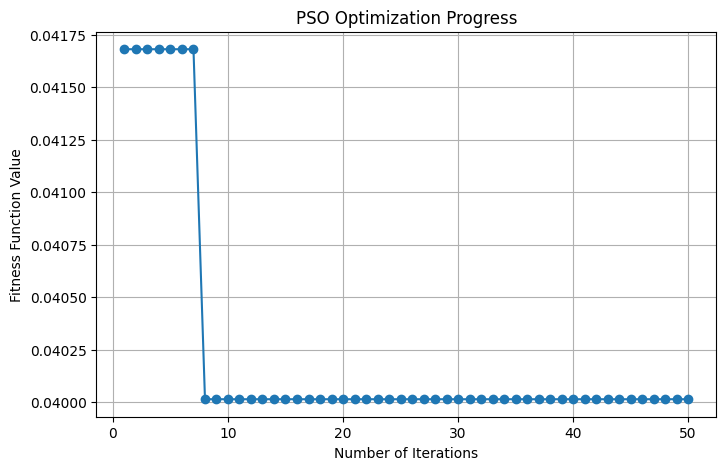

In [ ]:
# Store best fitness value per iteration
fitness_history = []
iteration = 0
# PSO main loop
for iteration in range(n_iterations):
    #print(f"Iteration {iteration + 1}/{n_iterations}")

    for i in range(n_particles):
        score = fitness(positions[i])

        if score < personal_best_score[i]:
            personal_best_score[i] = score
            personal_best_pos[i] = positions[i]

        if score < global_best_score:
            global_best_score = score
            global_best_pos = positions[i]

    # Store best fitness value
    fitness_history.append(global_best_score)

    #selected_features = global_best_pos[:-1] > 0.5 #Linear SVM
    selected_features = global_best_pos[:-2] > 0.5 #Non-Linear SVM

    num_selected_features = np.sum(selected_features)
    #print(f"  Selected Features Count: {num_selected_features}")

    # Update velocity and position
    #wmin = 0.4
    #wmax = 0.9
    #w = wmax - (wmax - wmin) * iteration / n_iterations   #PSO-V2

    r1, r2 = np.random.rand(n_particles, dim), np.random.rand(n_particles, dim)
    velocities = (w * velocities + c1 * r1 * (personal_best_pos - positions) +
                  c2 * r2 * (global_best_pos - positions))
    positions = np.clip(positions + velocities, [b[0] for b in bounds], [b[1] for b in bounds])

# Final selected features & best C value
'''
best_features = global_best_pos[:-1] > 0.5 #Linear SVM
best_C = global_best_pos[-1] #Linear SVM
'''
best_features = global_best_pos[:-2] > 0.5 #Non-Linear SVM
best_C = global_best_pos[-2] #Non-Linear SVM
best_gamma = global_best_pos[-1] #Non-Linear SVM

print(f"Total Features : {num_selected_features}")
print(f"Selected Features: {np.where(best_features)[0]}")
print(f"Best C Value: {best_C}")
print(f"Best gamma Value: {best_gamma}")  #Non-Linear SVM

# Plot fitness function vs. Iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations + 1), fitness_history, marker='o', linestyle='-')
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Function Value")
plt.title("PSO Optimization Progress")
plt.grid(True)
plt.show()

In [ ]:
selected_features = np.where(best_features)[0]
formatted_output = "[ " + " , ".join(map(str, selected_features)) + " ]"
print(formatted_output)

#Train Model with hybrid FA-PSO (HFAPSO)

In [6]:
def hybrid_fpso(x, obj_func, lb, ub, popsize, maxiter, alpha=0.5, beta0=1, gamma=1):
    lb = np.array(lb)
    ub = np.array(ub)
    dim = len(lb)
    fireflies = x.copy()
    velocities = np.random.uniform(-1, 1, (popsize, dim))  # Initialize velocities for PSO
    fitness = np.array([obj_func(f) for f in fireflies])
    personal_best = fireflies.copy()
    personal_best_scores = fitness.copy()
    global_best_idx = np.argmin(fitness)
    global_best = fireflies[global_best_idx]
    global_best_score = fitness[global_best_idx]
    fitness_history = []

    iteration = 0
    for iteration in range(maxiter):
        for i in range(popsize):
            # Hybrid FA update
            for j in range(popsize):
                if fitness[j] < fitness[i]:  # Firefly j is brighter than i
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = beta0 * np.exp(-gamma * r**2)  # Attractiveness
                    step = beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(dim) - 0.5)
                    fireflies[i] += step
                    fireflies[i] = np.clip(fireflies[i], lb, ub)

            # Particle update based on fitness comparison
            if fitness[i] < personal_best_scores[i]:  # if current solution is better than personal best
                # Apply FA update for velocity and position
                x_temp = fireflies[i].copy()  # Save current position as x_temp
                beta = beta0 * np.exp(-gamma * np.linalg.norm(fireflies[i] - global_best)**2)  # Update beta
                fireflies[i] += beta * (fireflies[i] - global_best) + alpha * (np.random.rand(dim) - 0.5)

                # Update velocity as described in your formula
                velocities[i] = fireflies[i] + x_temp
            else:
                # Apply PSO update for velocity and position
                r1, r2 = np.random.rand(dim), np.random.rand(dim)
                wmin = 0.4
                wmax = 0.9
                w = wmax - (wmax - wmin) * iteration / maxiter  # PSO-V2
                velocities[i] = w * velocities[i] + c1 * r1 * (personal_best[i] - fireflies[i]) + c2 * r2 * (global_best - fireflies[i])
                fireflies[i] += velocities[i]

            fireflies[i] = np.clip(fireflies[i], lb, ub)

        # Evaluate new fitness values
        fitness = np.array([obj_func(f) for f in fireflies])

        # Update personal and global bests
        for i in range(popsize):
            if fitness[i] < personal_best_scores[i]:
                personal_best[i] = fireflies[i].copy()
                personal_best_scores[i] = fitness[i]

        global_best_idx = np.argmin(fitness)
        if fitness[global_best_idx] < global_best_score:
            global_best = fireflies[global_best_idx].copy()
            global_best_score = fitness[global_best_idx]

        fitness_history.append(global_best_score)
        print(f"Iteration {iteration + 1}/{maxiter}, Best Objective: {global_best_score}")

    return global_best, global_best_score, fitness_history

Iteration 1/50, Best Objective: 0.061710914454277295
Iteration 2/50, Best Objective: 0.0484070796460178
Iteration 3/50, Best Objective: 0.0484070796460178
Iteration 4/50, Best Objective: 0.0484070796460178
Iteration 5/50, Best Objective: 0.0484070796460178
Iteration 6/50, Best Objective: 0.0483628318584072
Iteration 7/50, Best Objective: 0.04668141592920359
Iteration 8/50, Best Objective: 0.04668141592920359
Iteration 9/50, Best Objective: 0.04668141592920359
Iteration 10/50, Best Objective: 0.04668141592920359
Iteration 11/50, Best Objective: 0.04668141592920359
Iteration 12/50, Best Objective: 0.04668141592920359
Iteration 13/50, Best Objective: 0.04502949852507375
Iteration 14/50, Best Objective: 0.04502949852507375
Iteration 15/50, Best Objective: 0.04502949852507375
Iteration 16/50, Best Objective: 0.04502949852507375
Iteration 17/50, Best Objective: 0.04502949852507375
Iteration 18/50, Best Objective: 0.04502949852507375
Iteration 19/50, Best Objective: 0.04502949852507375
Iterat

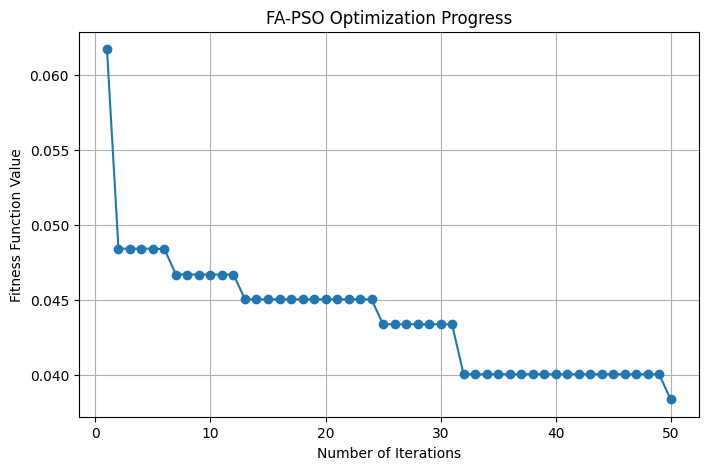

In [8]:
# FA-PSO parameters
n_particles = 50
n_iterations = 50
#dim = X.shape[1] + 1  # Features + 1 for SVM C parameter
dim = X.shape[1] + 2  # Features + 2 for SVM C and gamma
c1=1.5
c2=1.5

#bounds = [(0, 1)] * X.shape[1] + [(0.0001, 10)]  # Feature selection & SVM C range
bounds = [(0, 1)] * X.shape[1] + [(0.0001, 10)]+ [(0.00001, 10)]  # Feature selection & SVM C range & gamma

lb = [b[0] for b in bounds]
ub = [b[1] for b in bounds]

# Initialize particles' positions
x = np.random.rand(n_particles, dim) * (np.array(ub) - np.array(lb)) + np.array(lb)

# Run Hybrid FA-PSO optimization
best_solution, best_score, fitness_history = hybrid_fpso(x, fitness, lb, ub, n_particles, n_iterations, alpha=0.5, beta0=1, gamma=1)

# Print final results
print(f"Best Solution: {best_solution}")
print(f"Best Score: {best_score}")

# Plot fitness function vs. Iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_iterations + 1), fitness_history, marker='o', linestyle='-')
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Function Value")
plt.title("FA-PSO Optimization Progress")
plt.grid(True)
plt.show()


In [11]:
#selected_features = best_solution[:-1] > 0.5
selected_features = best_solution[:-2] > 0.5 #RBF
num_selected_features = np.sum(selected_features)
#best_C = best_solution[dim-1]
best_C = best_solution[dim-2]      #RBF
best_gamma = best_solution[dim-1]  #RBF
print(f"Total Features : {num_selected_features}")
print(f"Selected Features: {np.where(selected_features)[0]}")
print(f"Best C Value: {best_C}")
print(f"Best gamma Value: {best_gamma}") #RBF

Total Features : 10
Selected Features: [ 1  4  7 13 15 19 22 24 28 29]
Best C Value: 9.979046468410575
Best gamma Value: 0.03704387371847877


In [12]:
best_C

np.float64(9.979046468410575)

In [13]:
best_gamma

np.float64(0.03704387371847877)

In [ ]:
# Assume X_train, X_test, y_train, y_test are already defined
# Extract only the selected features
selected_features = ast.literal_eval(formatted_output)
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the SVM model with optimized C
#svm_model = SVC(C=best_C, kernel='linear')  # Or 'rbf' if you're using an RBF kernel
svm_model = SVC(C=best_C, kernel='rbf', gamma=best_gamma)
svm_model.fit(X_train_selected, y_train)

SVC(C=np.float64(0.7343352313825339), gamma=np.float64(0.10751310378382616))

In [16]:
selected_features = np.where(selected_features)[0].tolist()
selected_features

[1, 4, 7, 13, 15, 19, 22, 24, 28, 29]

In [17]:
selected_features

[1, 4, 7, 13, 15, 19, 22, 24, 28, 29]

In [18]:
# Assume X_train, X_test, y_train, y_test are already defined
# Extract only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the SVM model with optimized C
#svm_model = SVC(C=best_C, kernel='linear')  # Or 'rbf' if you're using an RBF kernel
svm_model = SVC(C=best_C, gamma=best_gamma, kernel='rbf')
svm_model.fit(X_train_selected, y_train)

SVC(C=np.float64(9.979046468410575), gamma=np.float64(0.03704387371847877))

#Test Model

##ROC Curve

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC

    Diagnosis
204         B
70          M
131         M
431         B
540         B
..        ...
486         B
75          M
249         B
238         B
265         M

[114 rows x 1 columns]


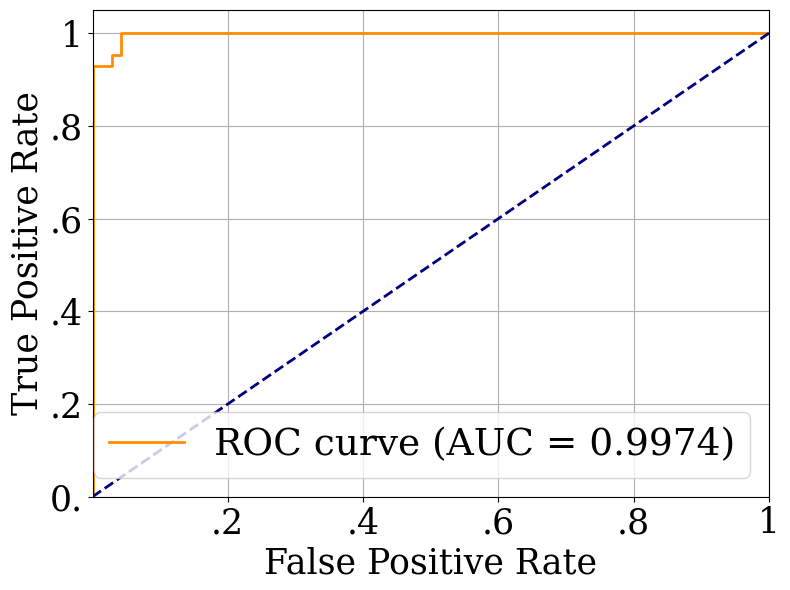

In [20]:
plt.rcParams['font.family'] = 'serif'  # fallback

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]


# Re-initialize the SVM model with probability estimates enabled

#svm_model = SVC(C=C_best, kernel='linear', probability=True)
svm_model = SVC(C=best_C, gamma=best_gamma, kernel='rbf', probability=True)


# Train the model
svm_model.fit(X_train_selected, y_train)

# Predict probabilities
y_prob = svm_model.predict_proba(X_test_selected)[:, 1]

# Compute ROC curve and AUC (specifying the positive label)
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='M') #dataset No.1
roc_auc = auc(fpr, tpr)
print(y_test)
# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

from matplotlib.ticker import FormatStrFormatter

plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0], labels=['.2', '.4', '.6', '.8', '1'], fontsize=25)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.', '.2', '.4', '.6', '.8', '1'], fontsize=25)

plt.xlabel('False Positive Rate', fontsize=25)
plt.ylabel('True Positive Rate', fontsize=25)
#plt.title('Receiver Operating Characteristic (ROC)')
#plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc="lower right", fontsize=27)
plt.grid(True)
plt.tight_layout()
plt.savefig("roc.png", dpi=300)
plt.show()

In [21]:
y_pred = svm_model.predict(X_test_selected)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()  # Works for binary classification

# Compute Sensitivity (Recall) & Specificity
acc = (TP + TN) / (TP + TN + FP + FN)
pre = TP / (TP + FP)
sensitivity = TP / (TP + FN)  # Same as recall
specificity = TN / (TN + FP)
f1 = 2 * (pre * sensitivity) / (pre + sensitivity)

# Print results
'''
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
'''
print(f"{acc:.4f}")
print(f"{pre:.4f}")
print(f"{sensitivity:.4f}")
print(f"{specificity:.4f}")
print(f"{f1:.4f}")

# Classification Report (with Recall included)
#print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

0.9649
0.9535
0.9535
0.9718
0.9535
